In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [2]:
df = pd.read_csv("audit_risk.csv")

In [3]:
df.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


In [4]:
def preprocessing(df):
    
    df.drop('LOCATION_ID', axis=1, inplace=True)

    null_value = df.isnull().values.any()
    print("Null Values/Missing Values: ", null_value)

    if null_value:
        df = df.dropna()
        print("Null Values Removed")
    
    df.plot.scatter(x='TOTAL', y='numbers')
    plt.show()
    
    outlier = LocalOutlierFactor(n_neighbors=5)
    outlier.fit_predict(df)
    outlier_scores = outlier.negative_outlier_factor_
    df = df[outlier_scores > -2.5]
    
    print("Preprocessing is Complete")
    return df


In [5]:
def model(df):
    y = df['Risk']
    X = df.drop('Risk', axis=1)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    clf = AdaBoostClassifier()
    clf.fit(X_train, y_train)
    
    
    y_pred = clf.predict(X_test)

    print("Confusion Matrix: ")
    print(confusion_matrix(y_test, y_pred))
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    print("Precision: ", precision_score(y_test, y_pred))
    print("Recall: ", recall_score(y_test, y_pred), "\n")
    
    n_estimators = [50, 100, 150]
    learning_rate = [1.0, 0.01, 0.001]

    for n in n_estimators:
        for l in learning_rate:
            clf = AdaBoostClassifier(n_estimators=n, learning_rate=l)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            print("n_estimators: ", n, "learning_rate: ", l)
            print("Accuracy: ", accuracy_score(y_test, y_pred))
            print("Precision: ", precision_score(y_test, y_pred))
            print("Recall: ", recall_score(y_test, y_pred),"\n")

Null Values/Missing Values:  True
Null Values Removed


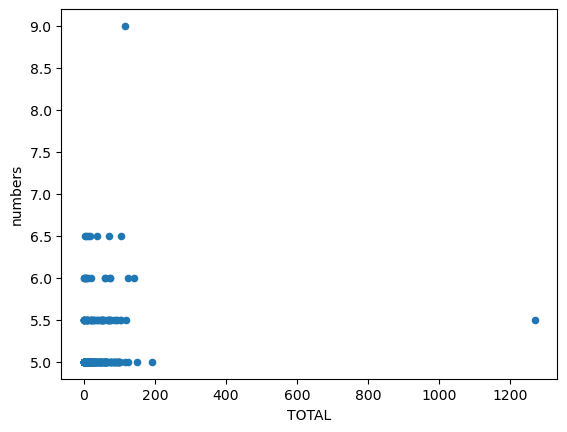

Preprocessing is Complete
Confusion Matrix: 
[[84  0]
 [ 0 62]]
Accuracy:  1.0
Precision:  1.0
Recall:  1.0 

n_estimators:  50 learning_rate:  1.0
Accuracy:  1.0
Precision:  1.0
Recall:  1.0 

n_estimators:  50 learning_rate:  0.01
Accuracy:  1.0
Precision:  1.0
Recall:  1.0 

n_estimators:  50 learning_rate:  0.001
Accuracy:  1.0
Precision:  1.0
Recall:  1.0 

n_estimators:  100 learning_rate:  1.0
Accuracy:  1.0
Precision:  1.0
Recall:  1.0 

n_estimators:  100 learning_rate:  0.01
Accuracy:  1.0
Precision:  1.0
Recall:  1.0 

n_estimators:  100 learning_rate:  0.001
Accuracy:  1.0
Precision:  1.0
Recall:  1.0 

n_estimators:  150 learning_rate:  1.0
Accuracy:  1.0
Precision:  1.0
Recall:  1.0 

n_estimators:  150 learning_rate:  0.01
Accuracy:  1.0
Precision:  1.0
Recall:  1.0 

n_estimators:  150 learning_rate:  0.001
Accuracy:  1.0
Precision:  1.0
Recall:  1.0 



In [6]:
model(preprocessing(df))

In [7]:
df.head()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,0.2,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,0.2,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,0.2,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,0.6,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,0.2,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0
